# Reuters Newswires
## Multiclass classification
46 topics, at least 10 examples of each

# Data Preparation

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
#decode back to words
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
#offset by 3 because 0, 1, 2 reserved for padding, start of sequence, and unknown
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
#label associated with each example is integer 0-45, topic index
train_labels[10]

3

In [7]:
import numpy as np

In [8]:
#vectorize data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
#vectorize lables
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_train_labels = to_one_hot(train_labels)

In [10]:
#built in way to one-hot-encode (categorical encode) the data
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Model Definition

In [11]:
from keras import models
from keras import layers

In [12]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Model Compilation

In [13]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Partition Validation Set

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Model Training

In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 159us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s 56us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 0s 62us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 0s 60us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [========================

In [16]:
import matplotlib.pyplot as plt

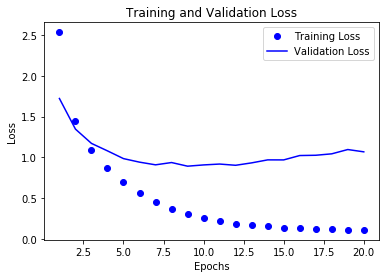

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

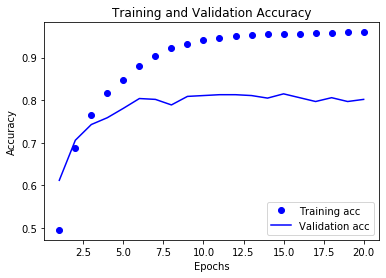

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# From Scratch
Based on graph, overfitting occurs after 7 epochs, so we stop at 7

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation ='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 80us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/7
7982/7982 [==============================] - 0s 57us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/7
7982/7982 [==============================] - 0s 57us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/7
7982/7982 [==============================] - 0s 55us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/7
7982/7982 [==============================] - 0s 55us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/7
7982/7982 [==============================] - 0s 55us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/7
2246/2246 [==============================] - 0s 74us/step


[0.9905546934394462, 0.784505788094214]

# Random Classification for Comparison

In [20]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.20035618878005343

# Generating Predictions

In [21]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [22]:
#coef sum to one: this is a probability distribution
np.sum(predictions[0])

1.0000001

In [23]:
#class with highest probability
np.argmax(predictions[0])

3

# Alternate Label Encoding
Integer tensor instead of one-hot-encoding

In [24]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
#Use sparse_categorical_crossentropy. Mathematically identical to categorical_crossentropy, different interface

# Smaller Layers

In [25]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation ='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 82us/step - loss: 3.0985 - acc: 0.2762 - val_loss: 2.3947 - val_acc: 0.5470
Epoch 2/7
7982/7982 [==============================] - 0s 59us/step - loss: 1.9787 - acc: 0.6344 - val_loss: 1.7102 - val_acc: 0.6360
Epoch 3/7
7982/7982 [==============================] - 0s 60us/step - loss: 1.4589 - acc: 0.7017 - val_loss: 1.4117 - val_acc: 0.6970
Epoch 4/7
7982/7982 [==============================] - 0s 57us/step - loss: 1.1805 - acc: 0.7541 - val_loss: 1.2532 - val_acc: 0.7240
Epoch 5/7
7982/7982 [==============================] - 0s 60us/step - loss: 0.9947 - acc: 0.7903 - val_loss: 1.1495 - val_acc: 0.7530
Epoch 6/7
7982/7982 [==============================] - 0s 59us/step - loss: 0.8500 - acc: 0.8242 - val_loss: 1.0770 - val_acc: 0.7700
Epoch 7/7
2246/2246 [==============================] - 0s 68us/step


[1.1014869196119843, 0.7600178094390027]

# Larger Layers

In [26]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation ='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 87us/step - loss: 2.1653 - acc: 0.5465 - val_loss: 1.4214 - val_acc: 0.6860
Epoch 2/7
7982/7982 [==============================] - 0s 56us/step - loss: 1.1093 - acc: 0.7607 - val_loss: 1.1193 - val_acc: 0.7530
Epoch 3/7
7982/7982 [==============================] - 0s 61us/step - loss: 0.7765 - acc: 0.8356 - val_loss: 0.9743 - val_acc: 0.7850
Epoch 4/7
7982/7982 [==============================] - 1s 65us/step - loss: 0.5540 - acc: 0.8846 - val_loss: 0.8978 - val_acc: 0.8090
Epoch 5/7
7982/7982 [==============================] - 0s 58us/step - loss: 0.3998 - acc: 0.9156 - val_loss: 0.8871 - val_acc: 0.8070
Epoch 6/7
7982/7982 [==============================] - 0s 60us/step - loss: 0.3172 - acc: 0.9308 - val_loss: 0.9045 - val_acc: 0.8070
Epoch 7/7
2246/2246 [==============================] - 0s 72us/step


[0.994348821317311, 0.7862867320210193]

# One Hidden Layer

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation ='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 88us/step - loss: 2.5294 - acc: 0.5366 - val_loss: 1.7500 - val_acc: 0.6550
Epoch 2/7
7982/7982 [==============================] - 1s 64us/step - loss: 1.4298 - acc: 0.7288 - val_loss: 1.3236 - val_acc: 0.7300
Epoch 3/7
7982/7982 [==============================] - 1s 63us/step - loss: 1.0515 - acc: 0.7928 - val_loss: 1.1247 - val_acc: 0.7640
Epoch 4/7
7982/7982 [==============================] - 0s 58us/step - loss: 0.8270 - acc: 0.8330 - val_loss: 1.0146 - val_acc: 0.7960
Epoch 5/7
7982/7982 [==============================] - 0s 57us/step - loss: 0.6668 - acc: 0.8651 - val_loss: 0.9457 - val_acc: 0.8120
Epoch 6/7
7982/7982 [==============================] - 0s 54us/step - loss: 0.5454 - acc: 0.8909 - val_loss: 0.9021 - val_acc: 0.8100
Epoch 7/7
2246/2246 [==============================] - 0s 73us/step


[0.9368844306161122, 0.7965271594475554]

# Three Hidden Layers

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation ='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 108us/step - loss: 2.7707 - acc: 0.4771 - val_loss: 1.8778 - val_acc: 0.5890
Epoch 2/7
7982/7982 [==============================] - 0s 53us/step - loss: 1.5453 - acc: 0.6571 - val_loss: 1.4183 - val_acc: 0.6870
Epoch 3/7
7982/7982 [==============================] - 0s 56us/step - loss: 1.1741 - acc: 0.7300 - val_loss: 1.2229 - val_acc: 0.7310
Epoch 4/7
7982/7982 [==============================] - 0s 58us/step - loss: 0.9575 - acc: 0.7826 - val_loss: 1.1083 - val_acc: 0.7520
Epoch 5/7
7982/7982 [==============================] - 0s 50us/step - loss: 0.7636 - acc: 0.8305 - val_loss: 1.0365 - val_acc: 0.7710
Epoch 6/7
7982/7982 [==============================] - 0s 53us/step - loss: 0.6051 - acc: 0.8663 - val_loss: 0.9877 - val_acc: 0.7910
Epoch 7/7
2246/2246 [==============================] - 0s 77us/step


[1.0634984292839642, 0.7635796972926132]